In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import datetime as dt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
data = pd.read_csv('../../../../../../Users/kanoksak/Desktop/Tableau/MHCI/mhci.csv', parse_dates=['data_create'])


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (3,4,5,6,8,9,10,14,39,40,41,43,44,87,91,95,96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df=data #ถ่ายโอนข้อมูล
df.shape

(3588312, 102)

In [4]:
df['data_create'] = pd.to_datetime(df['data_create'],infer_datetime_format=True)

In [5]:
df=df.loc[(df['data_create']>='2021-10-01')]
df.shape

(1280717, 102)

In [6]:

df.head()

,id,data_create,type,group_taker,name_taker,surname_taker,gender_taker,age_taker,position_taker,work_taker,...,person,group_data,family,doctor,departments,other,c_trace,trace,contact,ok
631939,1739321,2021-10-01 00:00:00,2,อสม.,มณี,เฉยบรรดิษฐ,หญิง,56,อสม.,บ้าน,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631940,1739322,2021-10-01 00:03:00,2,อสม.,มณี,เฉยบรรดิษฐ,หญิง,56,อสม.,บ้าน,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631941,1739323,2021-10-01 00:05:00,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631942,1739324,2021-10-01 00:16:34,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
631943,1739325,2021-10-01 00:17:12,1,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df[['gender','people_type','age','rq1','rq2'
,'rq3','st_5']]  #เลือกข้อมูล train

df.head()

,gender,people_type,age,rq1,rq2,rq3,st_5
631939,ชาย,ประชาชน,54,9,9,9,0
631940,หญิง,ประชาชน,50,10,10,10,0
631941,หญิง,อสม,56,10,10,10,0
631942,หญิง,ประชาชน,39,5,7,5,14
631943,หญิง,เจ้าหน้าที่สาธารณสุข,24,6,10,10,0


In [8]:
df.isna().sum()

gender         110
people_type    129
age              0
rq1              0
rq2              0
rq3              0
st_5             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

gender         0
people_type    0
age            0
rq1            0
rq2            0
rq3            0
st_5           0
dtype: int64

In [11]:
df = df.drop(df[(df.age < 0) | (df.age > 100)].index)

In [12]:
df['age'].max()

100

In [13]:
df['age'].min()

0

In [14]:
df.shape

(1280526, 7)

In [15]:
df.groupby(['gender']).count()

,people_type,age,rq1,rq2,rq3,st_5
gender,,,,,,
ชาย,497403,497403,497403,497403,497403,497403
หญิง,783123,783123,783123,783123,783123,783123


In [16]:
df.groupby(['people_type']).count()

,gender,age,rq1,rq2,rq3,st_5
people_type,,,,,,
บุคคลากรทางการศึกษา,22768,22768,22768,22768,22768,22768
ประชาชน,984586,984586,984586,984586,984586,984586
ผู้ต้องราชทัณฑ์,1,1,1,1,1,1
ผู้สัมผัสเสี่ยงสูง,15428,15428,15428,15428,15428,15428
พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา,1774,1774,1774,1774,1774,1774
อสม,184368,184368,184368,184368,184368,184368
เจ้าหน้าที่สาธารณสุข,58373,58373,58373,58373,58373,58373
เจ้าหน้าที่หน่วยงานสังกัดอื่น,13177,13177,13177,13177,13177,13177
เจ้าหน้าที่เรือนจำ/ทัณฑสถาน,51,51,51,51,51,51


In [17]:
df=df.loc[(df['people_type'] == "ประชาชน") | (df['people_type'] == "อสม") | (df['people_type'] == "เจ้าหน้าที่สาธารณสุข")| (df['people_type'] == "เจ้าหน้าที่หน่วยงานสังกัดอื่น")| (df['people_type'] == "บุคคลากรทางการศึกษา")| (df['people_type'] == "พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา")| (df['people_type'] == "ผู้สัมผัสเสี่ยงสูง")]

In [18]:
df.groupby(['people_type']).count()

,gender,age,rq1,rq2,rq3,st_5
people_type,,,,,,
บุคคลากรทางการศึกษา,22768,22768,22768,22768,22768,22768
ประชาชน,984586,984586,984586,984586,984586,984586
ผู้สัมผัสเสี่ยงสูง,15428,15428,15428,15428,15428,15428
พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา,1774,1774,1774,1774,1774,1774
อสม,184368,184368,184368,184368,184368,184368
เจ้าหน้าที่สาธารณสุข,58373,58373,58373,58373,58373,58373
เจ้าหน้าที่หน่วยงานสังกัดอื่น,13177,13177,13177,13177,13177,13177


In [19]:
df.loc[df["gender"] == "ประชาชนชาย", "gender"] = "ชาย"
df.loc[df["gender"] == "ประชาชนหญิ", "gender"] = "หญิง"
df.groupby(['gender']).count()

,people_type,age,rq1,rq2,rq3,st_5
gender,,,,,,
ชาย,497363,497363,497363,497363,497363,497363
หญิง,783111,783111,783111,783111,783111,783111


In [20]:
df1_1= df.loc[df['st_5'] >=8]  #คัดเลือก 1/2
for i in range(1000):
    df1_2 = df1_1.take(np.random.permutation(len(df1_1))[:36400])

In [21]:
df1_2.shape

(36400, 7)

In [22]:
df2_1= df.loc[df['st_5'] <8] #คัดเลือก 1/2
for i in range(1000):
    df2_2 = df2_1.take(np.random.permutation(len(df2_1))[:36400])

In [23]:
df2_2.shape

(36400, 7)

In [24]:
df=df1_2.append(df2_2)
df.shape

(72800, 7)

In [25]:
df.to_csv('data.csv', index=False)

In [26]:
# ohenc1=OneHotEncoder(sparse=False)
# g1=ohenc1.fit_transform(df[['gender']])
# g1
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis = 1)
df

,gender,people_type,age,rq1,rq2,rq3,st_5,ชาย,หญิง
2417063,หญิง,ประชาชน,33,7,7,7,14,0,1
3479372,หญิง,ประชาชน,23,5,3,5,8,0,1
2804566,ชาย,เจ้าหน้าที่สาธารณสุข,52,9,9,9,10,1,0
2583042,หญิง,ประชาชน,31,5,10,10,13,0,1
3511242,หญิง,ประชาชน,37,1,3,5,9,0,1
...,...,...,...,...,...,...,...,...,...
2656005,ชาย,ประชาชน,48,6,8,6,1,1,0
2450635,หญิง,อสม,54,5,5,5,0,0,1
3161896,หญิง,ประชาชน,33,8,8,8,1,0,1
2940962,หญิง,ประชาชน,30,9,10,9,0,0,1


In [27]:
# ohenc1=OneHotEncoder(sparse=False)
# p1=ohenc1.fit_transform(df[['people_type']])
# p1
dummies = pd.get_dummies(df['people_type'])
df = pd.concat([df, dummies], axis = 1)
df

,gender,people_type,age,rq1,rq2,rq3,st_5,ชาย,หญิง,บุคคลากรทางการศึกษา,ประชาชน,ผู้สัมผัสเสี่ยงสูง,พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา,อสม,เจ้าหน้าที่สาธารณสุข,เจ้าหน้าที่หน่วยงานสังกัดอื่น
2417063,หญิง,ประชาชน,33,7,7,7,14,0,1,0,1,0,0,0,0,0
3479372,หญิง,ประชาชน,23,5,3,5,8,0,1,0,1,0,0,0,0,0
2804566,ชาย,เจ้าหน้าที่สาธารณสุข,52,9,9,9,10,1,0,0,0,0,0,0,1,0
2583042,หญิง,ประชาชน,31,5,10,10,13,0,1,0,1,0,0,0,0,0
3511242,หญิง,ประชาชน,37,1,3,5,9,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656005,ชาย,ประชาชน,48,6,8,6,1,1,0,0,1,0,0,0,0,0
2450635,หญิง,อสม,54,5,5,5,0,0,1,0,0,0,0,1,0,0
3161896,หญิง,ประชาชน,33,8,8,8,1,0,1,0,1,0,0,0,0,0
2940962,หญิง,ประชาชน,30,9,10,9,0,0,1,0,1,0,0,0,0,0


In [28]:
# sex = {'หญิง':0 , 'ชาย':1}          #แปลงค่าเพศ
# df['gender'] = \
#     df['gender'].apply(sex.get)  
# df['gender'] = df['gender'].fillna(df['gender'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย   

# people_type = {'ประชาชน':0 , 'อสม':1 , 'เจ้าหน้าที่สาธารณสุข':2 , 'เจ้าหน้าที่หน่วยงานสังกัดอื่น':3 , 'บุคคลากรทางการศึกษา':4 , 'พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา':5 , 'ผู้สัมผัสเสี่ยงสูง':6 , 'เจ้าหน้าที่เรือนจำ/ทัณฑสถาน':7 , 'ผู้ต้องราชทัณฑ์':8}        
# df['people_type'] = \
#     df['people_type'].apply(people_type.get)  
# df['people_type'] = \
#     df['people_type']=df['people_type'].div(df['people_type'].max()) 
# df['people_type'] = df['people_type'].fillna(df['people_type'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย   


df['age'] = \
    df['age']=df['age'].div(df['age'].max())   #แปลงค่าอายุ
df['age'] = df['age'].fillna(df['age'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย    

df['rq1'] = \
    df['rq1']=df['rq1'].div(df['rq1'].max()) #rq ข้อ 1
df['rq1'] = df['rq1'].fillna(df['rq1'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  

df['rq2'] = \
    df['rq2']=df['rq2'].div(df['rq2'].max()) #rq ข้อ 1
df['rq2'] = df['rq2'].fillna(df['rq2'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  

df['rq3'] = \
    df['rq3']=df['rq3'].div(df['rq3'].max()) #rq ข้อ 1
df['rq3'] = df['rq3'].fillna(df['rq3'].mean()) #แทนค่าว่างด้วยค่าเฉลี่ย  


df['st_5'] = df['st_5'].fillna(0) #แทนค่าว่างด้วยค่า0
df.loc[df['st_5'] < 8, 'st_5_len'] = 'False' 
df.loc[df['st_5'] >= 8, 'st_5_len'] = 'True' 

df2=df[['st_5_len']]  #เลือกข้อมูล test

df.head()


,gender,people_type,age,rq1,rq2,rq3,st_5,ชาย,หญิง,บุคคลากรทางการศึกษา,ประชาชน,ผู้สัมผัสเสี่ยงสูง,พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา,อสม,เจ้าหน้าที่สาธารณสุข,เจ้าหน้าที่หน่วยงานสังกัดอื่น,st_5_len
2417063,หญิง,ประชาชน,0.33,0.7,0.7,0.7,14,0,1,0,1,0,0,0,0,0,True
3479372,หญิง,ประชาชน,0.23,0.5,0.3,0.5,8,0,1,0,1,0,0,0,0,0,True
2804566,ชาย,เจ้าหน้าที่สาธารณสุข,0.52,0.9,0.9,0.9,10,1,0,0,0,0,0,0,1,0,True
2583042,หญิง,ประชาชน,0.31,0.5,1.0,1.0,13,0,1,0,1,0,0,0,0,0,True
3511242,หญิง,ประชาชน,0.37,0.1,0.3,0.5,9,0,1,0,1,0,0,0,0,0,True


In [29]:
#X=df[['gender','people_type','age','province_id']]  #เลือกข้อมูล train
X=df.drop('st_5', 1)
X=X.drop('st_5_len', 1)
X=X.drop('people_type', 1)
X=X.drop('gender', 1)
X[0:50]

/var/folders/wb/zm16pvzj3_z31fm2l6n3_svm0000gn/T/ipykernel_53195/394658726.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('st_5', 1)
/var/folders/wb/zm16pvzj3_z31fm2l6n3_svm0000gn/T/ipykernel_53195/394658726.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('st_5_len', 1)
/var/folders/wb/zm16pvzj3_z31fm2l6n3_svm0000gn/T/ipykernel_53195/394658726.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('people_type', 1)
/var/folders/wb/zm16pvzj3_z31fm2l6n3_svm0000gn/T/ipykernel_53195/394658726.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('gender', 1)


,age,rq1,rq2,rq3,ชาย,หญิง,บุคคลากรทางการศึกษา,ประชาชน,ผู้สัมผัสเสี่ยงสูง,พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา,อสม,เจ้าหน้าที่สาธารณสุข,เจ้าหน้าที่หน่วยงานสังกัดอื่น
2417063,0.33,0.7,0.7,0.7,0,1,0,1,0,0,0,0,0
3479372,0.23,0.5,0.3,0.5,0,1,0,1,0,0,0,0,0
2804566,0.52,0.9,0.9,0.9,1,0,0,0,0,0,0,1,0
2583042,0.31,0.5,1.0,1.0,0,1,0,1,0,0,0,0,0
3511242,0.37,0.1,0.3,0.5,0,1,0,1,0,0,0,0,0
3407458,0.29,0.2,0.3,0.3,0,1,0,1,0,0,0,0,0
2429238,0.14,0.3,0.3,0.4,0,1,0,1,0,0,0,0,0
3123719,0.25,0.7,0.6,0.7,0,1,0,1,0,0,0,0,0
3114864,0.48,0.8,0.8,0.8,0,1,0,1,0,0,0,0,0
2602350,0.18,0.6,0.6,1.0,1,0,0,1,0,0,0,0,0


In [30]:
df2[0:10]

,st_5_len
2417063,True
3479372,True
2804566,True
2583042,True
3511242,True
3407458,True
2429238,True
3123719,True
3114864,True
2602350,True


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72800 entries, 2417063 to 3479578
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                72800 non-null  float64
 1   rq1                                72800 non-null  float64
 2   rq2                                72800 non-null  float64
 3   rq3                                72800 non-null  float64
 4   ชาย                                72800 non-null  uint8  
 5   หญิง                               72800 non-null  uint8  
 6   บุคคลากรทางการศึกษา                72800 non-null  uint8  
 7   ประชาชน                            72800 non-null  uint8  
 8   ผู้สัมผัสเสี่ยงสูง                 72800 non-null  uint8  
 9   พระภิกษุ/สามเณร/นักบวช/ผู้นำศาสนา  72800 non-null  uint8  
 10  อสม                                72800 non-null  uint8  
 11  เจ้าหน้าที่สาธารณสุข               72800 non-n

In [32]:
Y = pd.get_dummies(df2).values #แปลงค่า dummies
print(Y[0:10])

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [33]:
np.array(X)

array([[0.33, 0.7 , 0.7 , ..., 0.  , 0.  , 0.  ],
       [0.23, 0.5 , 0.3 , ..., 0.  , 0.  , 0.  ],
       [0.52, 0.9 , 0.9 , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.33, 0.8 , 0.8 , ..., 0.  , 0.  , 0.  ],
       [0.3 , 0.9 , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.27, 1.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [34]:
Y.shape

(72800, 2)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(58240, 13)

In [37]:
x_test.shape

(14560, 13)

In [38]:
x_test= np.array(x_test) #แปลงเป็น Array
x_train= np.array(x_train) #แปลงเป็น Array

In [39]:
# 4-100-100-3
inputs = keras.Input(shape=(13,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(100, activation='relu')
d4 = layers.Dense(2)
outputs = d4(d3(d2(d1(inputs))))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.MeanSquaredError())


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-09 13:53:30.648029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-09 13:53:30.648434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [40]:
model.fit(x_train, y_train, epochs=300)


2022-10-09 13:53:31.028438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-09 13:53:31.031726: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-09 13:53:31.164217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/300
1820/1820 [==============================] - 8s 4ms/step - loss: 0.1463
Epoch 2/300
1820/1820 [==============================] - 7s 4ms/step - loss: 0.1226
Epoch 3/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1201
Epoch 4/300
1820/1820 [==============================] - 7s 4ms/step - loss: 0.1185
Epoch 5/300
1820/1820 [==============================] - 7s 4ms/step - loss: 0.1174
Epoch 6/300
1820/1820 [==============================] - 7s 4ms/step - loss: 0.1163
Epoch 7/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1155
Epoch 8/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1147
Epoch 9/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1139
Epoch 10/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1132
Epoch 11/300
1820/1820 [==============================] - 6s 3ms/step - loss: 0.1127
Epoch 12/300
1820/1820 [==============================] - 6s 3ms/step - lo

In [41]:

model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


2022-10-09 14:23:08.592529: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [42]:
Z = model.predict(x_test)
tf.argmax(Z,axis=1)

2022-10-09 14:23:08.813452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([0, 0, 1, ..., 0, 0, 1])>

In [43]:
_model = keras.models.load_model("my_model")
Z = _model.predict(x_test)
tf.argmax(Z,axis=1)

2022-10-09 14:23:09.458289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([0, 0, 1, ..., 0, 0, 1])>

In [44]:
tf.argmax(y_test, axis=1)

<tf.Tensor: shape=(14560,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 1])>

In [45]:
np.sum(tf.argmax(Z, axis=1) == tf.argmax(y_test, axis=1)) / len(Z)

0.8531593406593406

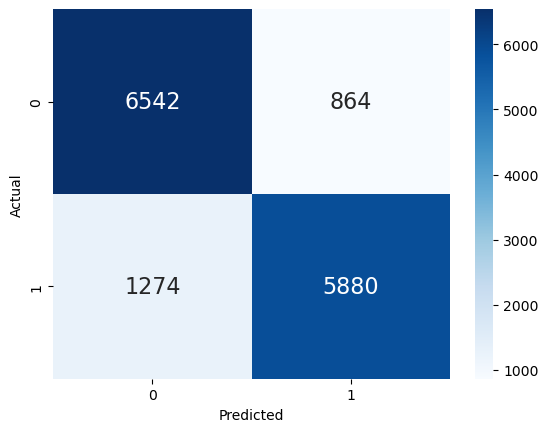

In [46]:
d = {'Z': tf.argmax(Z, axis=1), 'Y': tf.argmax(y_test, axis=1)}
df = pd.DataFrame(data=d )
confusion_matrix = pd.crosstab(df['Y'],df['Z'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()